## Use Case 3: Colocate different data

In [2]:
# Needed in IPython notebook only
from IPython.display import Image   
%matplotlib inline

from nansat import *

### Open MODIS/Aqua data with chlorophyll in the Barents Sea

03:52:13|40|nansat|_get_mapper|GDAL could not open occci_online:8D:chlor_a:2010-10-01, trying to read with Nansat mappers...
ERROR:Nansat:GDAL could not open occci_online:8D:chlor_a:2010-10-01, trying to read with Nansat mappers...


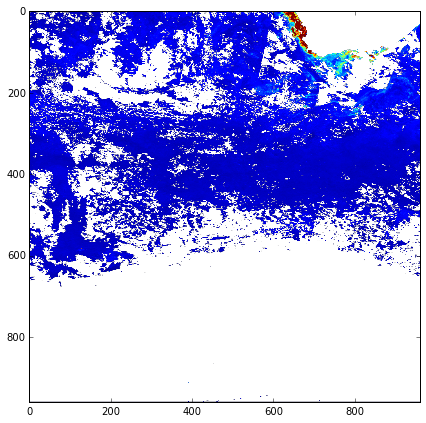

In [11]:
# define ROI (required for Nansat)
lons = [-10, 30]
lats = [-70, -30]

n1 = Nansat('occci_online:8D:chlor_a:2010-10-01', lons=lons, lats=lats)
# get matrix with chlorophyll and show
chlor_a1 = n1['chlor_a']
plt.figure(figsize=(7,7))
plt.imshow(chlor_a1, vmin=0, vmax=3)

### Create map with chlorophyll-a

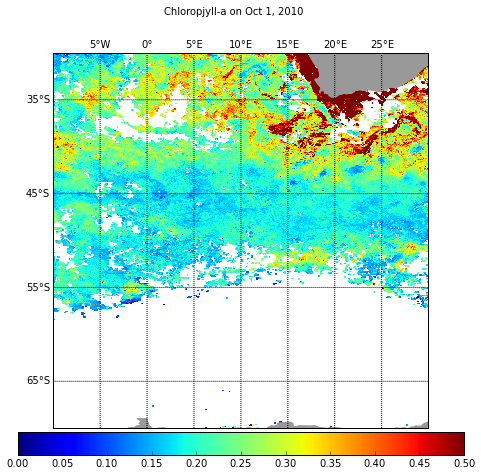

In [6]:
nmap = Nansatmap(n1, resolution='l')

# make plot of wind speed (color) and add colorbar
nmap.pcolormesh(chlor_a1, vmin=0, vmax=0.5)
nmap.add_colorbar(fontsize=10)

# add continents on top
nmap.draw_continents()

# draw grid of parallels and meridians
# at given locations
nmap.drawparallels([-65, -55, -45, -35], labels=[1,0,0,0])
nmap.drawmeridians([-5, 0, 5, 10, 15, 20, 25], labels=[0,0,1,0])

# add title
plt.suptitle('Chloropjyll-a on Oct 1, 2010')

# set size of the figure (inches)
nmap.fig.set_figheight(8)
nmap.fig.set_figwidth(8)

# save figure to a PNG file
nmap.save('usecase4a.png')

### Plot zonal average

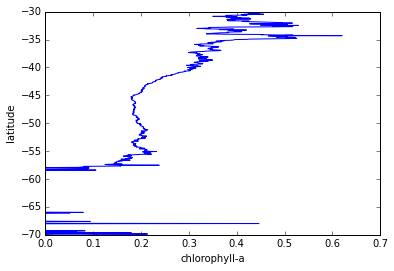

In [7]:
lon, lat = n1.get_geolocation_grids()
zonalChlAverage = np.nanmean(chlor_a1, axis=1)
plt.plot(zonalChlAverage, lat[:, 0])
plt.xlabel('chlorophyll-a')
plt.ylabel('latitude')


## Analyze time series of chlorophyll-a

### Create list of dates, filename, chlor_a arrays

In [63]:
# example of datetime library
import datetime
dt0 = datetime.datetime(2010,1,1)
dt1 = dt0 + datetime.timedelta(8)
print dt0, dt1
print dt0.strftime('%Y-%m-%d')

2010-01-01 00:00:00 2010-01-09 00:00:00
2010-01-01


In [57]:
period = 100 # days
step = 8     # days
dt0 = datetime.datetime(2010,1,1)
#dates = []
#for d in range(0, period, step):
#    dt1 = dt0 + datetime.timedelta(d)
#    date = dt1.strftime('%Y-%m-%d')
#    dates.append(d)

dates = [dt0 + datetime.timedelta(d) for d in range(0, period, step)]
dateStrings = [date.strftime('%Y-%m-%d') for date in dates]
print dateStrings

['2010-01-01', '2010-01-09', '2010-01-17', '2010-01-25', '2010-02-02', '2010-02-10', '2010-02-18', '2010-02-26', '2010-03-06', '2010-03-14', '2010-03-22', '2010-03-30', '2010-04-07']


In [58]:
filenames = ['occci_online:8D:chlor_a:%s' % date for date in dateStrings]
print filenames

['occci_online:8D:chlor_a:2010-01-01', 'occci_online:8D:chlor_a:2010-01-09', 'occci_online:8D:chlor_a:2010-01-17', 'occci_online:8D:chlor_a:2010-01-25', 'occci_online:8D:chlor_a:2010-02-02', 'occci_online:8D:chlor_a:2010-02-10', 'occci_online:8D:chlor_a:2010-02-18', 'occci_online:8D:chlor_a:2010-02-26', 'occci_online:8D:chlor_a:2010-03-06', 'occci_online:8D:chlor_a:2010-03-14', 'occci_online:8D:chlor_a:2010-03-22', 'occci_online:8D:chlor_a:2010-03-30', 'occci_online:8D:chlor_a:2010-04-07']


In [56]:
lons=[10, 20]
lats=[-55, -50]
chloraArrays = []
for filename in filenames:
    print filename
    n = Nansat(filename, lons=lons, lats=lats)
    chlor_a = n[1]
    chloraArrays.append(chlor_a)

# equal to
#chloraArrays = [Nansat(filename, lons=lons, lats=lats)[1] for filename in filenames]
# but we want to print filename for logging

04:34:03|40|nansat|_get_mapper|GDAL could not open occci_online:8D:chlor_a:2010-01-01, trying to read with Nansat mappers...
ERROR:Nansat:GDAL could not open occci_online:8D:chlor_a:2010-01-01, trying to read with Nansat mappers...


occci_online:8D:chlor_a:2010-01-01
occci_online:8D:chlor_a:2010-01-09

04:34:16|40|nansat|_get_mapper|GDAL could not open occci_online:8D:chlor_a:2010-01-09, trying to read with Nansat mappers...
ERROR:Nansat:GDAL could not open occci_online:8D:chlor_a:2010-01-09, trying to read with Nansat mappers...



occci_online:8D:chlor_a:2010-01-17

04:34:28|40|nansat|_get_mapper|GDAL could not open occci_online:8D:chlor_a:2010-01-17, trying to read with Nansat mappers...
ERROR:Nansat:GDAL could not open occci_online:8D:chlor_a:2010-01-17, trying to read with Nansat mappers...



occci_online:8D:chlor_a:2010-01-25

04:34:40|40|nansat|_get_mapper|GDAL could not open occci_online:8D:chlor_a:2010-01-25, trying to read with Nansat mappers...
ERROR:Nansat:GDAL could not open occci_online:8D:chlor_a:2010-01-25, trying to read with Nansat mappers...



occci_online:8D:chlor_a:2010-02-02

04:34:52|40|nansat|_get_mapper|GDAL could not open occci_online:8D:chlor_a:2010-02-02, trying to read with Nansat mappers...
ERROR:Nansat:GDAL could not open occci_online:8D:chlor_a:2010-02-02, trying to read with Nansat mappers...



occci_online:8D:chlor_a:2010-02-10

04:35:04|40|nansat|_get_mapper|GDAL could not open occci_online:8D:chlor_a:2010-02-10, trying to read with Nansat mappers...
ERROR:Nansat:GDAL could not open occci_online:8D:chlor_a:2010-02-10, trying to read with Nansat mappers...



occci_online:8D:chlor_a:2010-02-18

04:35:16|40|nansat|_get_mapper|GDAL could not open occci_online:8D:chlor_a:2010-02-18, trying to read with Nansat mappers...
ERROR:Nansat:GDAL could not open occci_online:8D:chlor_a:2010-02-18, trying to read with Nansat mappers...



occci_online:8D:chlor_a:2010-02-26

04:35:29|40|nansat|_get_mapper|GDAL could not open occci_online:8D:chlor_a:2010-02-26, trying to read with Nansat mappers...
ERROR:Nansat:GDAL could not open occci_online:8D:chlor_a:2010-02-26, trying to read with Nansat mappers...



occci_online:8D:chlor_a:2010-03-06

04:35:41|40|nansat|_get_mapper|GDAL could not open occci_online:8D:chlor_a:2010-03-06, trying to read with Nansat mappers...
ERROR:Nansat:GDAL could not open occci_online:8D:chlor_a:2010-03-06, trying to read with Nansat mappers...



occci_online:8D:chlor_a:2010-03-14

04:35:54|40|nansat|_get_mapper|GDAL could not open occci_online:8D:chlor_a:2010-03-14, trying to read with Nansat mappers...
ERROR:Nansat:GDAL could not open occci_online:8D:chlor_a:2010-03-14, trying to read with Nansat mappers...



occci_online:8D:chlor_a:2010-03-22

04:36:06|40|nansat|_get_mapper|GDAL could not open occci_online:8D:chlor_a:2010-03-22, trying to read with Nansat mappers...
ERROR:Nansat:GDAL could not open occci_online:8D:chlor_a:2010-03-22, trying to read with Nansat mappers...



occci_online:8D:chlor_a:2010-03-30

04:36:18|40|nansat|_get_mapper|GDAL could not open occci_online:8D:chlor_a:2010-03-30, trying to read with Nansat mappers...
ERROR:Nansat:GDAL could not open occci_online:8D:chlor_a:2010-03-30, trying to read with Nansat mappers...



occci_online:8D:chlor_a:2010-04-07

04:36:30|40|nansat|_get_mapper|GDAL could not open occci_online:8D:chlor_a:2010-04-07, trying to read with Nansat mappers...
ERROR:Nansat:GDAL could not open occci_online:8D:chlor_a:2010-04-07, trying to read with Nansat mappers...


In [59]:
chloraArrays = np.array(chloraArrays)
print chloraArrays.shape

(13, 120, 240)


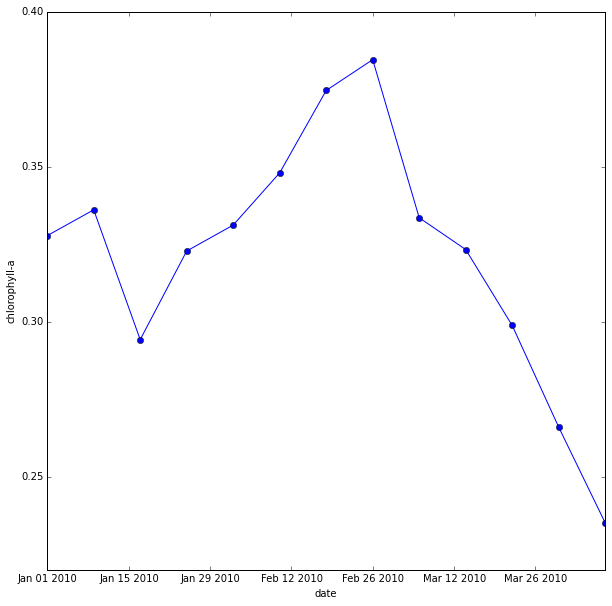

In [62]:
chlorValues = np.nanmean(np.nanmean(chloraArrays, axis=2), axis=1)
plt.figure(figsize=(10,10))

plt.plot(dates, chlorValues, 'o-')
plt.xlabel('date')
plt.ylabel('chlorophyll-a')

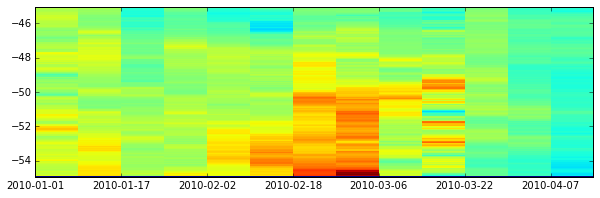

In [107]:
plt.figure(figsize=(10,10))
plt.imshow(np.nanmean(chloraArrays.T, axis=1), interpolation='nearest', aspect=.4, extent=[0, len(dates), lat.min(), lat.max()])
ticks = plt.xticks(range(0,len(dates),2), dateStrings[::2])